In [ ]:
from groupy import GrouprOutput
from pathlib import Path
import matplotlib.pyplot as plt

In [20]:
gendf_file = Path("__file__").absolute().parent.parent / "tests" / "files" / "U238_356"
assert gendf_file.exists()

In [21]:
groupr = GrouprOutput(gendf_file)

[info] The FEND record for MF1 appears to be missing
[info] Current position: MAT9237 MF3 MT1 at line 11
[info] The FEND record for MF3 appears to be missing
[info] Current position: MAT9237 MF5 MT18 at line 248
[info] The FEND record for MF5 appears to be missing
[info] Current position: MAT9237 MF6 MT2 at line 257
[info] The FEND record for MF6 appears to be missing
[info] Current position: MAT0 MF0 MT0 at line 499


In [22]:
# energy boundaries
groupr.energy_boundaries

array([1.390e-04, 1.520e-01, 4.140e-01, 1.130e+00, 3.060e+00, 8.320e+00,
       2.260e+01, 6.140e+01, 1.670e+02, 4.540e+02, 1.235e+03, 3.350e+03,
       9.120e+03, 2.480e+04, 6.760e+04, 1.840e+05, 3.030e+05, 5.000e+05,
       8.230e+05, 1.353e+06, 1.738e+06, 2.232e+06, 2.865e+06, 3.680e+06,
       6.070e+06, 7.790e+06, 1.000e+07, 1.200e+07, 1.350e+07, 1.500e+07,
       1.700e+07])

Text(0.5, 0, 'Neutron Energy [eV]')

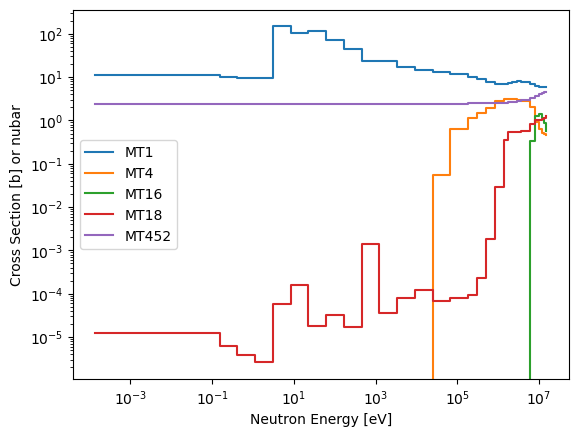

In [38]:
# pointwise values
for mt in groupr.pointwise.keys():
    plt.step(groupr.energy_boundaries[:-1],groupr.pointwise[mt].values, label=f"MT{mt}", where="post")

plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Cross Section [b] or nubar")
plt.xlabel("Neutron Energy [eV]")

Text(0.5, 0, 'Neutron Energy [eV]')

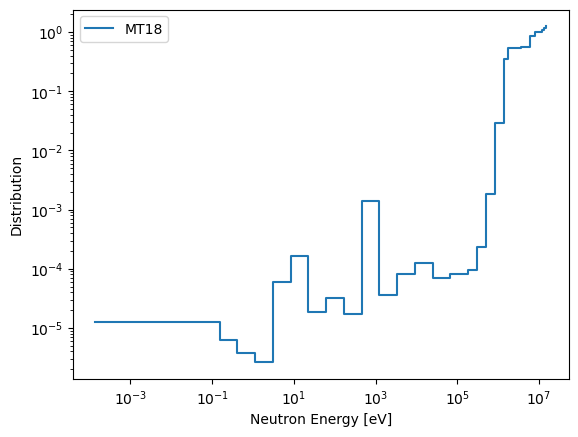

In [39]:
# outgoing distributions
for mt in groupr.outgoing_distributions.keys():
    plt.step(groupr.energy_boundaries[:-1],groupr.pointwise[mt].values, label=f"MT{mt}", where="post")

plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Distribution")
plt.xlabel("Neutron Energy [eV]")

(1e-05, np.float64(17000000.0))

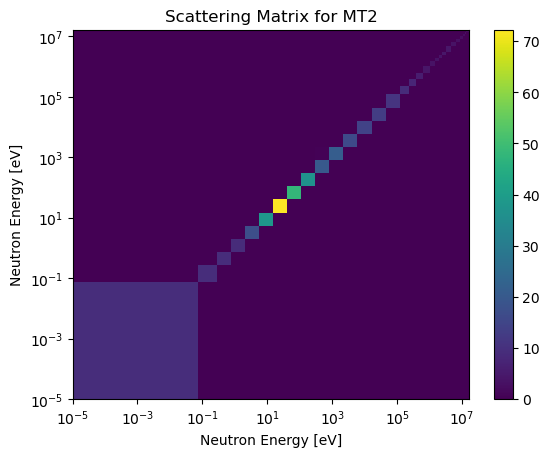

In [41]:
# scattering matrices

mt = 2
ell = 0
plt.pcolor(groupr.energy_boundaries[:-1], groupr.energy_boundaries[:-1], groupr.scattering_matrices[mt].values[:,:,ell])

plt.title(f"Scattering Matrix for MT{mt}")
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Neutron Energy [eV]")
plt.xlabel("Neutron Energy [eV]")
plt.xlim(1e-5,groupr.energy_boundaries[-1])
plt.ylim(1e-5,groupr.energy_boundaries[-1])